In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
dataset = keras.datasets.fashion_mnistc 
((X_treino , Y_treino),(X_teste, Y_teste)) = dataset.load_data()

In [3]:
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                        'Vestido', 'Casaco', 'Sandalia',
                        'Camisa', 'Tenis', 'Bolsa', 'Bota']

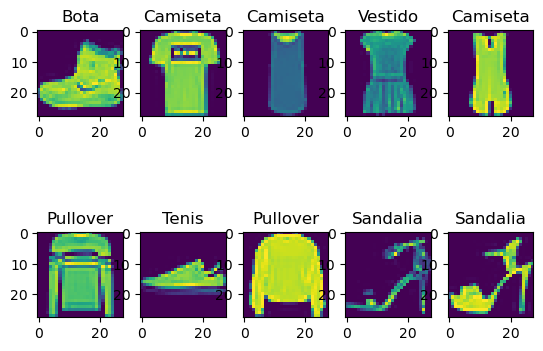

In [4]:
# plt.imshow(X_treino[0])
# plt.title(Y_treino[0])
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(X_treino[imagem])
    plt.title(nomes_classificacoes[Y_treino[imagem]])

In [5]:
X_treino = X_treino/float(255)#Normalizacao para melhorar a perda

primeira: #Camada de entrada - achatamento
segunda: #camada totalmente conectadas
terceira:  # camada que adormece neuronios (20%) para nao viciar
compile: #utilizado para quando casos de multiclasse(adam)

In [69]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(256, activation = 'relu'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = 'relu'),
                            keras.layers.Dense(64, activation = 'relu'),
                            keras.layers.Dense(10, activation = 'softmax')
                            ])
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) #utilizado para quando casos de multiclasse(adam)
historico = modelo.fit(X_treino, Y_treino, epochs=5, validation_split=0.2)

Epoch 1/5


c:\Users\henri\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7554 - loss: 0.6769 - val_accuracy: 0.8506 - val_loss: 0.4113
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8461 - loss: 0.4194 - val_accuracy: 0.8625 - val_loss: 0.3744
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3758 - val_accuracy: 0.8681 - val_loss: 0.3593
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8680 - loss: 0.3542 - val_accuracy: 0.8712 - val_loss: 0.3480
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8761 - loss: 0.3341 - val_accuracy: 0.8647 - val_loss: 0.3653


In [70]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Overfitting = treino muito bom + validação ruim.

O inverso (treino ruim + validação boa) seria mais raro e geralmente indicaria underfitting 

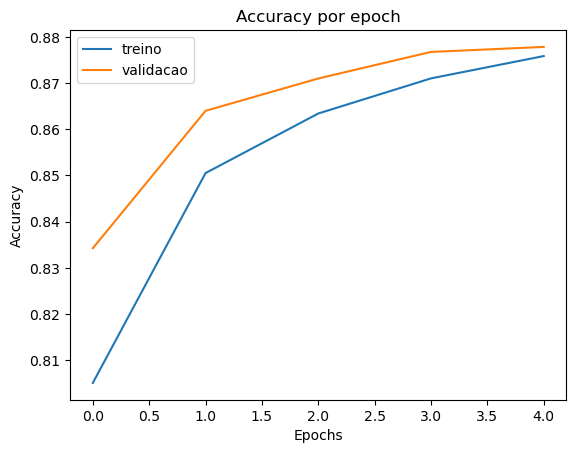

In [48]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Accuracy por epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['treino', 'validacao'])

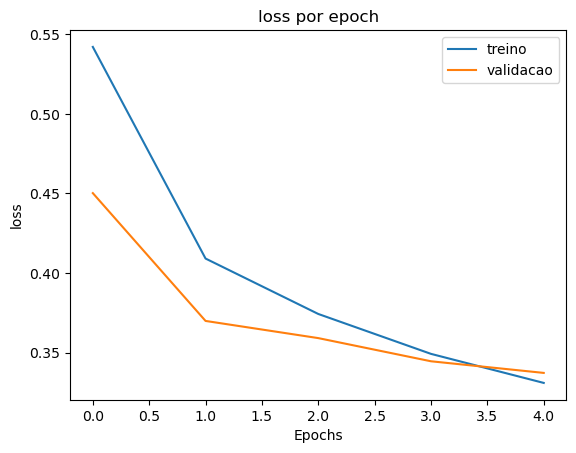

In [49]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('loss por epoch')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['treino', 'validacao'])

In [16]:
testes = modelo.predict(X_teste)
print(np.argmax(testes[1]))
print(Y_teste[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2
2


In [19]:
loss_teste, accuracy_teste = modelo.evaluate(X_teste, Y_teste)
print(loss_teste)
print(accuracy_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8681 - loss: 49.8772
52.67441177368164
0.8666999936103821


In [71]:
#Testando o modelo salvo
teste_modelo_salvo = modelo_salvo.predict(X_teste)
print(np.argmax(teste_modelo_salvo[0]))
print(Y_teste[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
9
9
